### Gülşah Eldemir
### Mastering Applied Data Science with Deep Learning, December, 2022  


  


                                                      NLP Project Final Project
                          
  
                                          "Classifying Amazon reviews based on customer ratings using NLP" 

# LİBRARİES

In [1]:
#!pip install spacy

In [2]:
#!pip install sklearn


In [3]:
#!pip install langdetect

In [4]:
#!pip install textblob

In [5]:
#!pip install autocorrect

In [6]:
#!pip install nltk

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob
import numpy as np
import scipy as sp
from spacy import displacy
import sys
#import pycountry
from langdetect import detect

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud, STOPWORDS
import os
from PIL import Image
from autocorrect import spell

import nltk
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import RegexpStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from autocorrect import spell


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


## ***Reading Data***

In [8]:
dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

In [9]:
shuffled=df.sample(frac=1)

In [10]:
shuffled.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
174376,A3TUZOJZM9008Y,B000BNNGUC,"Michael A. Brown ""maniacmedia""","[18, 22]",About two months before Apple released the new...,5,It's enough to make you scream!,1137888000,"01 22, 2006"
223195,A13ST46D9DMD83,B000HAOVGM,"B. Johnson ""Johnson""","[0, 0]","I'm partial to Canon compact digitals, but I p...",5,My favorite compact digital,1244505600,"06 9, 2009"
1677078,A17WM3NTCID9DS,B00HFRWWAM,"Robert D. Harmon ""bobnbob3""","[1, 1]",I installed it on a Windows 7 system and neede...,5,excellent fast backup,1396396800,"04 2, 2014"
1617377,A3112D9P7HXV0E,B00DM5F19A,The real Amazon fan,"[6, 6]",I bought this primarily for streaming internet...,5,Absolutely what I was looking for.,1392595200,"02 17, 2014"
1617110,A2ZY49IDE6TY5I,B00DLKE8C2,"Crabigail Cassidy ""Crabby Abby""","[1, 1]",This is a nice mount that attaches effortlessl...,4,Great Idea,1383350400,"11 2, 2013"


## ***NLP Pre-Processing***

In [11]:
result=np.array_split(shuffled,5)


In [12]:
df1=result[0].reset_index().drop("index",axis=1)
df2=result[1].reset_index().drop("index",axis=1)
df3=result[2].reset_index().drop("index",axis=1)
df4=result[3].reset_index().drop("index",axis=1)
df5=result[4].reset_index().drop("index",axis=1)

In [13]:
df1.shape

(337838, 9)

In [14]:
df1.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IVF4BCLAVQN2,B0019EHU8G,"Mary ""I always tell it truthfully""","[0, 0]",I bought this cable thinking it was just a cab...,5,Awesome,1356480000,"12 26, 2012"
1,A3G3D54ZM8F8EQ,B0094NY3R0,Chatty,"[0, 1]",Funny thing is the guy I talked with about thi...,5,Awesome,1382832000,"10 27, 2013"
2,A1JOT17LXXAPMI,B008ABOJKS,E.L.,"[5, 6]",UPDATE: 3/20/2014 -- Recent firmware seems to ...,3,"Good router, except for one MAJOR flaw",1367971200,"05 8, 2013"
3,A24YW9YH3GWDM4,B004E2Z88O,FGS762,"[0, 0]",The snap on holster/backplate protector sold e...,2,Not compatible with case protection,1325635200,"01 4, 2012"
4,A2V2JW4VMDFA0C,B006GWO5WK,NaN,"[0, 0]",I purchased this charger for my Kindle Fire HD...,1,Charger seems dangerous,1360195200,"02 7, 2013"


In [15]:
df1.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
337833,A1X3GSQ1ZM4UEQ,B0000AQR8F,"oldyeller ""Joseph Simpson""","[0, 0]",I bought 3 of these switches to interconnect m...,5,These VGA switches are great,1347408000,"09 12, 2012"
337834,A211QYKZXHBY2K,B004071ZX0,Patrick E.,"[0, 0]",I connected this to the DisplayPort output on ...,5,Works perfectly,1384041600,"11 10, 2013"
337835,A1U5IJHJK84S54,B009DCNP9O,Daniel A. Koblosh,"[0, 0]",Replaces the outlet cover of a standard duplex...,4,"Good, But More Features Than Necessary",1369353600,"05 24, 2013"
337836,A3O3AUXLXV8GG2,B00006JN3G,Razor,"[0, 0]",It uses some sort of carbon powder to clean th...,5,Amazing!,1353974400,"11 27, 2012"
337837,AKRNC1Q6D8JR0,B003964HXS,Golfing Fool,"[0, 0]",I actually gave a way a mini (but not micro) 5...,5,It is just what I wanted,1316736000,"09 23, 2011"


In [16]:
df1.shape

(337838, 9)

In [17]:
df1.columns


Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [18]:
df1.describe()

,overall,unixReviewTime
count,337838.000000,3.378380e+05
mean,4.224839,1.340535e+09
std,1.183990,6.352624e+07
min,1.000000,9.292320e+08
25%,4.000000,1.317946e+09
50%,5.000000,1.360800e+09
75%,5.000000,1.385078e+09
max,5.000000,1.406074e+09


In [19]:
df1.corr()

,overall,unixReviewTime
overall,1.000000,0.058182
unixReviewTime,0.058182,1.000000


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337838 entries, 0 to 337837
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      337838 non-null  object
 1   asin            337838 non-null  object
 2   reviewerName    332860 non-null  object
 3   helpful         337838 non-null  object
 4   reviewText      337838 non-null  object
 5   overall         337838 non-null  int64 
 6   summary         337838 non-null  object
 7   unixReviewTime  337838 non-null  int64 
 8   reviewTime      337838 non-null  object
dtypes: int64(2), object(7)
memory usage: 23.2+ MB


In [21]:
df1.isnull().sum()

reviewerID           0
asin                 0
reviewerName      4978
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [22]:
df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AVSMRPI23DQI2,B000VEMNRS,"HomerKSA ""Homer KSA""","[0, 0]",I had been late actually to write a review on ...,5,for all you long distance DAD's with SKYPE,1235001600,"02 19, 2009"
1,A174X7S1J75AZ3,B0051PSQQ4,Jamie Hamel-Smith,"[0, 0]","It's a great and portable umbrella, but there'...",4,"Does the job, and the quality is quite good",1384214400,"11 12, 2013"
2,A6EARR1782W5N,B00H3OYSHW,K. Li,"[0, 0]",This case comes with it bulid-in screen cover/...,4,2 in 1 IpadAir case and bluetooth keyboard !,1403568000,"06 24, 2014"
3,A39UANX63CUAEI,B00ADXLBS4,Mike,"[1, 1]",Unpacking I ran into a 30 hour radio series on...,5,cheap and exceeds my expectation,1396742400,"04 6, 2014"
4,A2XTEZQASWZLJA,B004BUTGD2,"Michael J. Eckman ""Mike""","[3, 3]",Its a 25' RJ11 phone cord. What more can I sa...,5,Does what its supposed to!,1350777600,"10 21, 2012"


In [23]:
df2.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
337833,A360104XRFH2SE,B002OOWC4C,Meghan,"[182, 184]",I spent quite a bit of time looking at various...,5,Fantastic tablet for the money!,1255996800,"10 20, 2009"
337834,A34SNV6K27YBRW,B005UUY25E,RSH,"[0, 0]",It solves the problem of not enough usb portso...,5,Solves the usb port problem.,1368921600,"05 19, 2013"
337835,A3341UQUADKC9B,B006GWO5WK,NaN,"[0, 0]",Charges fast and works well. Got it right awa...,5,works well,1351641600,"10 31, 2012"
337836,APC8FKR7TTDQI,B007X4TGXI,"LRic ""Lric""","[0, 0]",When I started using this it was great/awesome...,2,Great when it's set as a stationary external d...,1394150400,"03 7, 2014"
337837,A1EUP72GB2GZOP,B006QB1RPY,Ives,"[0, 1]",In the short time that I owned this router I n...,2,This guy was really bad. Plus I don't know if ...,1404950400,"07 10, 2014"


In [24]:
df2.shape

(337838, 9)

In [25]:
df2.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [26]:
df2.describe()

,overall,unixReviewTime
count,337838.000000,3.378380e+05
mean,4.222000,1.340638e+09
std,1.186728,6.328978e+07
min,1.000000,9.313920e+08
25%,4.000000,1.318378e+09
50%,5.000000,1.360800e+09
75%,5.000000,1.384992e+09
max,5.000000,1.406074e+09


In [27]:
df2.corr()

,overall,unixReviewTime
overall,1.000000,0.059083
unixReviewTime,0.059083,1.000000


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337838 entries, 0 to 337837
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      337838 non-null  object
 1   asin            337838 non-null  object
 2   reviewerName    332802 non-null  object
 3   helpful         337838 non-null  object
 4   reviewText      337838 non-null  object
 5   overall         337838 non-null  int64 
 6   summary         337838 non-null  object
 7   unixReviewTime  337838 non-null  int64 
 8   reviewTime      337838 non-null  object
dtypes: int64(2), object(7)
memory usage: 23.2+ MB


In [29]:
df2.isnull().sum()

reviewerID           0
asin                 0
reviewerName      5036
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

**Çok fazla veri olduğu için 5 tane csv dosyayı oluşturduk ve veriyi beşe ayrıdık. 

In [30]:
df1.to_csv("amazon_1.csv")
df2.to_csv("amazon_2.csv")
df3.to_csv("amazon_3.csv")
df4.to_csv("amazon_4.csv")
df5.to_csv("amazon_5.csv")

In [31]:
df=pd.read_csv("amazon_1.csv").drop("Unnamed: 0",axis=1)

In [32]:
df.sample(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
144126,A254MDH9GJ1HQD,B00BVRQEKG,"Maleko ""islndsnw""","[0, 0]",works great. I have 2 of these and one is on ...,5,good product for price,1405468800,"07 16, 2014"
270019,A283X4O3JWU7LP,B00B5BRIMG,shn006,"[0, 0]",fast SSD and good price. However does not real...,3,Does not support encryption,1405900800,"07 21, 2014"
113873,A2LI3RBUEH7TXO,B0001MKU48,Doodle Meriwether,"[1, 4]",These things are flimsy and they arrived warpe...,2,so much for purchasing based on reviews...,1327536000,"01 26, 2012"
334207,A2YEFJMLQTZZWE,B000O9GGLY,A. Westner,"[0, 0]",Very good optics produce sharp images. I'm usi...,5,Good Quality Webcam,1359676800,"02 1, 2013"
209560,A2YKWYC3WQJX5J,B007Q8GOGI,"Shannon Lastowski ""Queen of Caffeine""","[0, 0]","So often, right before I first power up, I see...",5,I confess...,1354060800,"11 28, 2012"


Sütunları incelediğimizde, yorum yapanların ID'si, isimleri, yorum yapma tarihlerinin işime yaramadığını görüyorum. Yorumların kendisi ve verilen puanlamalar üzerinden devam edeceğim

In [33]:
df.drop(["reviewerID","asin","reviewerName","helpful","summary","unixReviewTime","reviewTime"],axis=1,inplace=True)

In [34]:
df["overall"]

0         5
1         5
2         3
3         2
4         1
         ..
337833    5
337834    5
337835    4
337836    5
337837    5
Name: overall, Length: 337838, dtype: int64

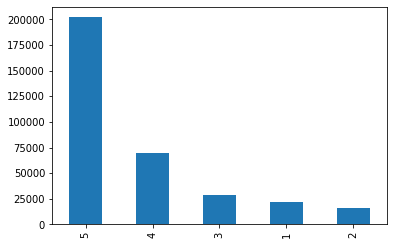

In [35]:
df.overall.value_counts().plot.bar()

In [36]:
df.loc[df['overall']==3, 'sentimentoverall']= 'nötr'
df.loc[df['overall']<3, 'sentimentoverall']= 'negatif'
df.loc[df['overall']>3, 'sentimentoverall']= 'pozitif'
df=df[["overall", "sentimentoverall", "reviewText"]]
df.head()

,overall,sentimentoverall,reviewText
0,5,pozitif,I bought this cable thinking it was just a cab...
1,5,pozitif,Funny thing is the guy I talked with about thi...
2,3,nötr,UPDATE: 3/20/2014 -- Recent firmware seems to ...
3,2,negatif,The snap on holster/backplate protector sold e...
4,1,negatif,I purchased this charger for my Kindle Fire HD...


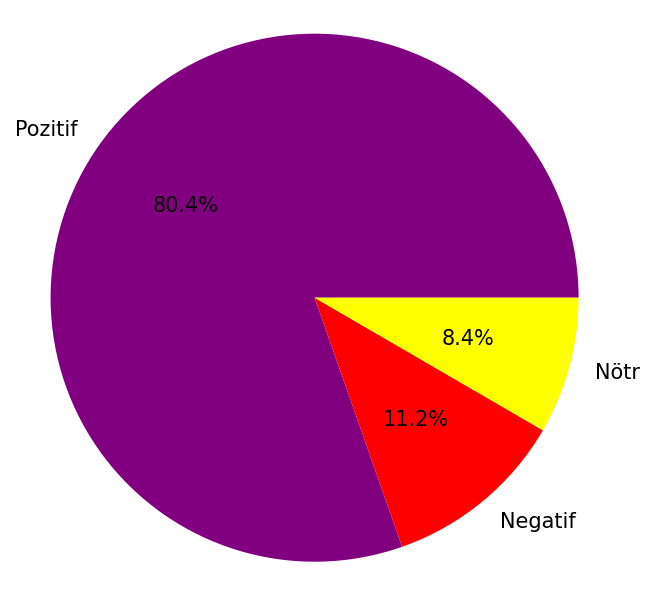

In [37]:
pie_sentiment=df.sentimentoverall.value_counts(normalize=True)
plt.figure(figsize=(5,5), dpi=150),
labels='Pozitif', 'Negatif', 'Nötr'
colors=['purple', 'red', 'yellow']
plt.pie(pie_sentiment,colors=colors,labels=labels,autopct='%1.1f%%')
plt.axis('equal');

Genellikle pozitif yorumlar yapılmış.

yorumları düzenliyorum--->

In [38]:
df['reviewText']=df['reviewText'].str.lower()                 #bütün sütunu küçük harfe çevirir
df['reviewText']=df['reviewText'].str.replace('[^\w\s]','')   #noktalama işaretlerini kaldırır
df['reviewText']=df['reviewText'].str.replace('[\d+]','')     #rakamları kaldırır
df['reviewText']=df['reviewText'].str.replace('[\n]','')      #yeni satırları kaldırır
df['reviewText']=df['reviewText'].str.replace('[\r]','')      #enter i kaldırır

In [39]:
df.sentimentoverall.value_counts()

pozitif    271549
negatif     38001
nötr        28288
Name: sentimentoverall, dtype: int64

In [40]:
df.sentimentoverall.value_counts(normalize=True)

pozitif    0.803785
negatif    0.112483
nötr       0.083732
Name: sentimentoverall, dtype: float64

In [41]:
df.sample(10)

,overall,sentimentoverall,reviewText
219230,5,pozitif,ive only had this in use for four days but it ...
165359,5,pozitif,i debated for a long time about getting a tabl...
229372,5,pozitif,i just like the way these hdmi cables look and...
66178,5,pozitif,it is noticeably more responsive than the two ...
230104,2,negatif,sony slr inbody image stabilization that works...
194578,4,pozitif,knockoff brick not hp but it does the job and...
248790,1,negatif,swann has refused me warranty service they ar...
300302,5,pozitif,i got this at a better price than i could find...
223685,5,pozitif,these are well built and sturdy yet flexible e...
63164,2,negatif,the sound quality is very very good my ultimat...


In [42]:

df["reviewText"][0]


'i bought this cable thinking it was just a cable  i was surprised to get follow up in the mail from the company with an  number for any support i might need  was a nice surprise since customer support is so rare these days  the cable is well made and works perfectly  i would pay a little more and get this cable again  i would also buy other electronics from them since their customer support is so awesome  it shipped fast and all went smoothly  i strongly recommend this company and this cable'

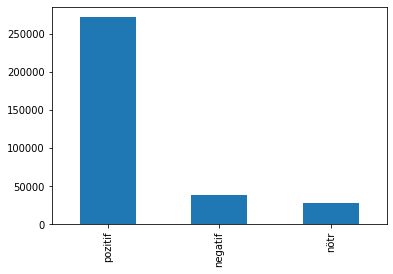

In [43]:
df["sentimentoverall"].value_counts().plot.bar()

Yorumlardaki boşlukları kaldıralım---->

In [44]:
df=df[df.reviewText.notna()]


***Tokenize***

In [45]:
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(str(i)) for i in df['reviewText'].values]

In [46]:
df['reviewText']

0         i bought this cable thinking it was just a cab...
1         funny thing is the guy i talked with about thi...
2         update   recent firmware seems to have fixed t...
3         the snap on holsterbackplate protector sold el...
4         i purchased this charger for my kindle fire hd...
                                ...                        
337833    i bought  of these switches to interconnect my...
337834    i connected this to the displayport output on ...
337835    replaces the outlet cover of a standard duplex...
337836    it uses some sort of carbon powder to clean th...
337837    i actually gave a way a mini but not micro  cd...
Name: reviewText, Length: 337615, dtype: object

***Stopwords***

In [47]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
nltk.download("stopwords")
nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
#df['reviewText']=df['reviewText'].apply(lambda x: [word for word in x if word not in stopwords])

In [50]:
import nltk
nltk.download("wordnet")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [52]:
#from nltk.stem import WordNetLemmatizer
#lemmatizer=WordNetLemmatizer()
#df['lemmatize']=[[lemmatizer.lemmatize(i) for i in words] for words in df['reviewText'].values]

### Buradan sonrasında, ne kadar denesem de RAM çöküyor ve devam edemiyorum. Yine de her adımı yorum satırı olarak bırakıyorum---->

Yorumlar için sentiment bakalım--->

In [53]:
#from textblob import TextBlob
#df[["polarity","subjectivity"]]=df["reviewText"].apply(lambda t:pd.Series(TextBlob(t).sentiment))


In [54]:
#df.loc[df['subjectivity']>0.5,'sentimentPolarity']="positive" #positive
#df.loc[df['subjectivity']==0.5,'sentimentPolarity']="neutral" #neutral
#df.loc[df['subjectivity']<0.5,'sentimentPolarity']="negative" #negative
#df.head()

# Word Cloud

In [55]:
pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from wordcloud import WordCloud

In [57]:
def create_wordcloud(text):
    mask = np.array(Image.open("images.jpg"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=25000,
                  stopwords=stopwords)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))


In [58]:
possitive_data_overall_sentiment=df[df["sentimentoverall"]=="positive"]["reviewText"]
negative_data_overall_sentiment=df[df["sentimentoverall"]=="negative"]["reviewText"]
neutral_data_overall_sentiment=df[df["sentimentoverall"]=="neutral"]["reviewText"]

In [59]:
#wc(possitive_data_overall_sentiment,"white")
#wc(negative_data_overall_sentiment,"white")
#wc(neutral_data_overall_sentiment,"white")

## **Classification**

In [60]:
df.overall=df.overall.astype("category")


In [61]:
x=df['reviewText']
y=df['sentimentoverall']

In [62]:
vect=CountVectorizer()

In [63]:
x=vect.fit_transform(x)

In [64]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42, test_size=.20)

In [65]:
x.shape, y.shape

((337615, 417005), (337615,))

In [66]:
print(x)

  (0, 40617)	1
  (0, 363737)	4
  (0, 47985)	5
  (0, 363478)	1
  (0, 182154)	2
  (0, 397583)	3
  (0, 187201)	1
  (0, 351457)	1
  (0, 368784)	1
  (0, 143909)	2
  (0, 134108)	1
  (0, 384211)	1
  (0, 171366)	1
  (0, 359672)	3
  (0, 208038)	1
  (0, 138146)	2
  (0, 67809)	2
  (0, 406512)	1
  (0, 12708)	1
  (0, 241159)	1
  (0, 134653)	1
  (0, 15211)	1
  (0, 350460)	3
  (0, 217327)	1
  (0, 231717)	1
  :	:
  (337614, 370106)	1
  (337614, 355098)	1
  (337614, 123815)	1
  (337614, 398574)	1
  (337614, 335808)	2
  (337614, 204308)	1
  (337614, 303210)	1
  (337614, 353407)	2
  (337614, 335254)	1
  (337614, 334894)	1
  (337614, 55698)	2
  (337614, 368964)	1
  (337614, 159722)	1
  (337614, 166946)	1
  (337614, 142444)	2
  (337614, 221210)	1
  (337614, 296327)	1
  (337614, 233822)	1
  (337614, 216250)	1
  (337614, 55938)	1
  (337614, 203263)	1
  (337614, 270006)	1
  (337614, 186804)	1
  (337614, 125473)	1
  (337614, 222734)	1


In [67]:
x_train

<270092x417005 sparse matrix of type '<class 'numpy.int64'>'
	with 18653420 stored elements in Compressed Sparse Row format>

In [68]:
x_test

<67523x417005 sparse matrix of type '<class 'numpy.int64'>'
	with 4646223 stored elements in Compressed Sparse Row format>

In [69]:
y_train

94439     pozitif
123493    pozitif
102583    pozitif
277628    pozitif
323850    pozitif
           ...   
119975    pozitif
259359    negatif
132036    pozitif
146980    pozitif
122055    negatif
Name: sentimentoverall, Length: 270092, dtype: object

In [70]:
y_test

48232     pozitif
269510       nötr
140537       nötr
238302    pozitif
331301    pozitif
           ...   
171415    pozitif
52490     pozitif
16062     pozitif
50976     pozitif
308028    pozitif
Name: sentimentoverall, Length: 67523, dtype: object

In [71]:
l=LogisticRegression()

In [72]:
l.fit(x_train,y_train) 

LogisticRegression()

In [73]:
pred=l.predict(x_test)

In [74]:
accuracy_score(pred,y_test)  

0.8511173970350844

In [75]:
m=MultinomialNB()

In [76]:
pred2=m.fit(x_train,y_train).predict(x_test) 

In [77]:
accuracy_score(pred2,y_test)

0.8295543740651333